In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [361]:
df_train  = pd.read_csv("data/train.csv")
df_sample = pd.read_csv("data/sample_submission.csv")
df_test   = pd.read_csv("data/train.csv")

labels = ['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
 'Obesity_Type_III' ,'Obesity_Type_II' ,'Overweight_Level_I',
 'Obesity_Type_I']

# drop id (not useful)
df_train.drop('id',axis=1,inplace=True)
df_test.drop('id',axis=1,inplace=True)

In [362]:
# add BMI
df_train['BMI'] = (df_train['Weight'] / df_train['Height']**2)
# display(df_train)

In [363]:
numerical_cols   = df_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=[object]).columns.tolist()

num_numerical_cols = len(numerical_cols)
num_numerical_rows = num_numerical_cols // 4

num_categorical_cols = len(categorical_cols)
num_categorical_rows = num_categorical_cols // 4

In [364]:
from sklearn.model_selection import train_test_split

y = df_train['NObeyesdad']
x = df_train.copy().drop(columns=['NObeyesdad'])

categoricals_cols_no_result = categorical_cols.remove("NObeyesdad")
x = pd.get_dummies(x, columns=categoricals_cols_no_result, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

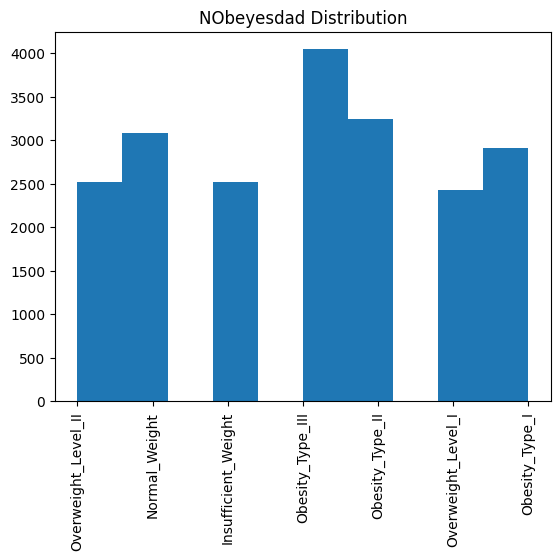

In [365]:
plt.hist(y)
plt.title(f'NObeyesdad Distribution')
plt.xticks(rotation=90)
plt.show() 


In [366]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

def get_stats(predictions):
  result = {}
  result['acc_score'] = accuracy_score(y_test,predictions)
  result['prec_score'] = precision_score(y_test,predictions,average='macro')
  result['recall_score'] = recall_score(y_test,predictions,average='macro')
  result['f1_score'] = f1_score(y_test,predictions,average='macro')
  result['confusion_matrix'] = confusion_matrix(y_test,predictions)
  return result

In [367]:
"""
Balancing the classes only decreases the accuracy

# Count the occurrences of each class in the 'NObeyesdad' column
class_counts = df_train['NObeyesdad'].value_counts()
print("Class counts before balancing:")
print(class_counts)

# Find the minimum count (least represented class)
min_count = class_counts.min()

# Balance the dataset by undersampling
df_train = df_train.groupby('NObeyesdad').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
"""

'\nBalancing the classes only decreases the accuracy\n\n# Count the occurrences of each class in the \'NObeyesdad\' column\nclass_counts = df_train[\'NObeyesdad\'].value_counts()\nprint("Class counts before balancing:")\nprint(class_counts)\n\n# Find the minimum count (least represented class)\nmin_count = class_counts.min()\n\n# Balance the dataset by undersampling\ndf_train = df_train.groupby(\'NObeyesdad\').apply(lambda x: x.sample(min_count)).reset_index(drop=True)\n'

In [368]:
print(df_train.shape)

(20758, 18)


In [369]:
# number of na
mv = df_train.isna().sum().sum()

# number of duplicates
dv = df_train.duplicated().sum()

# there are no NAs or Duplicates in the test dataset
print(mv)
print(dv)

0
0


In [370]:
display(df_train.describe(include=[np.number]).T, df_train.describe(include=[object]).T)

,count,mean,std,min,25%,50%,75%,max
Age,20758.0,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000
BMI,20758.0,30.241842,8.333932,12.868541,24.088223,29.384757,37.011168,54.997991


,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


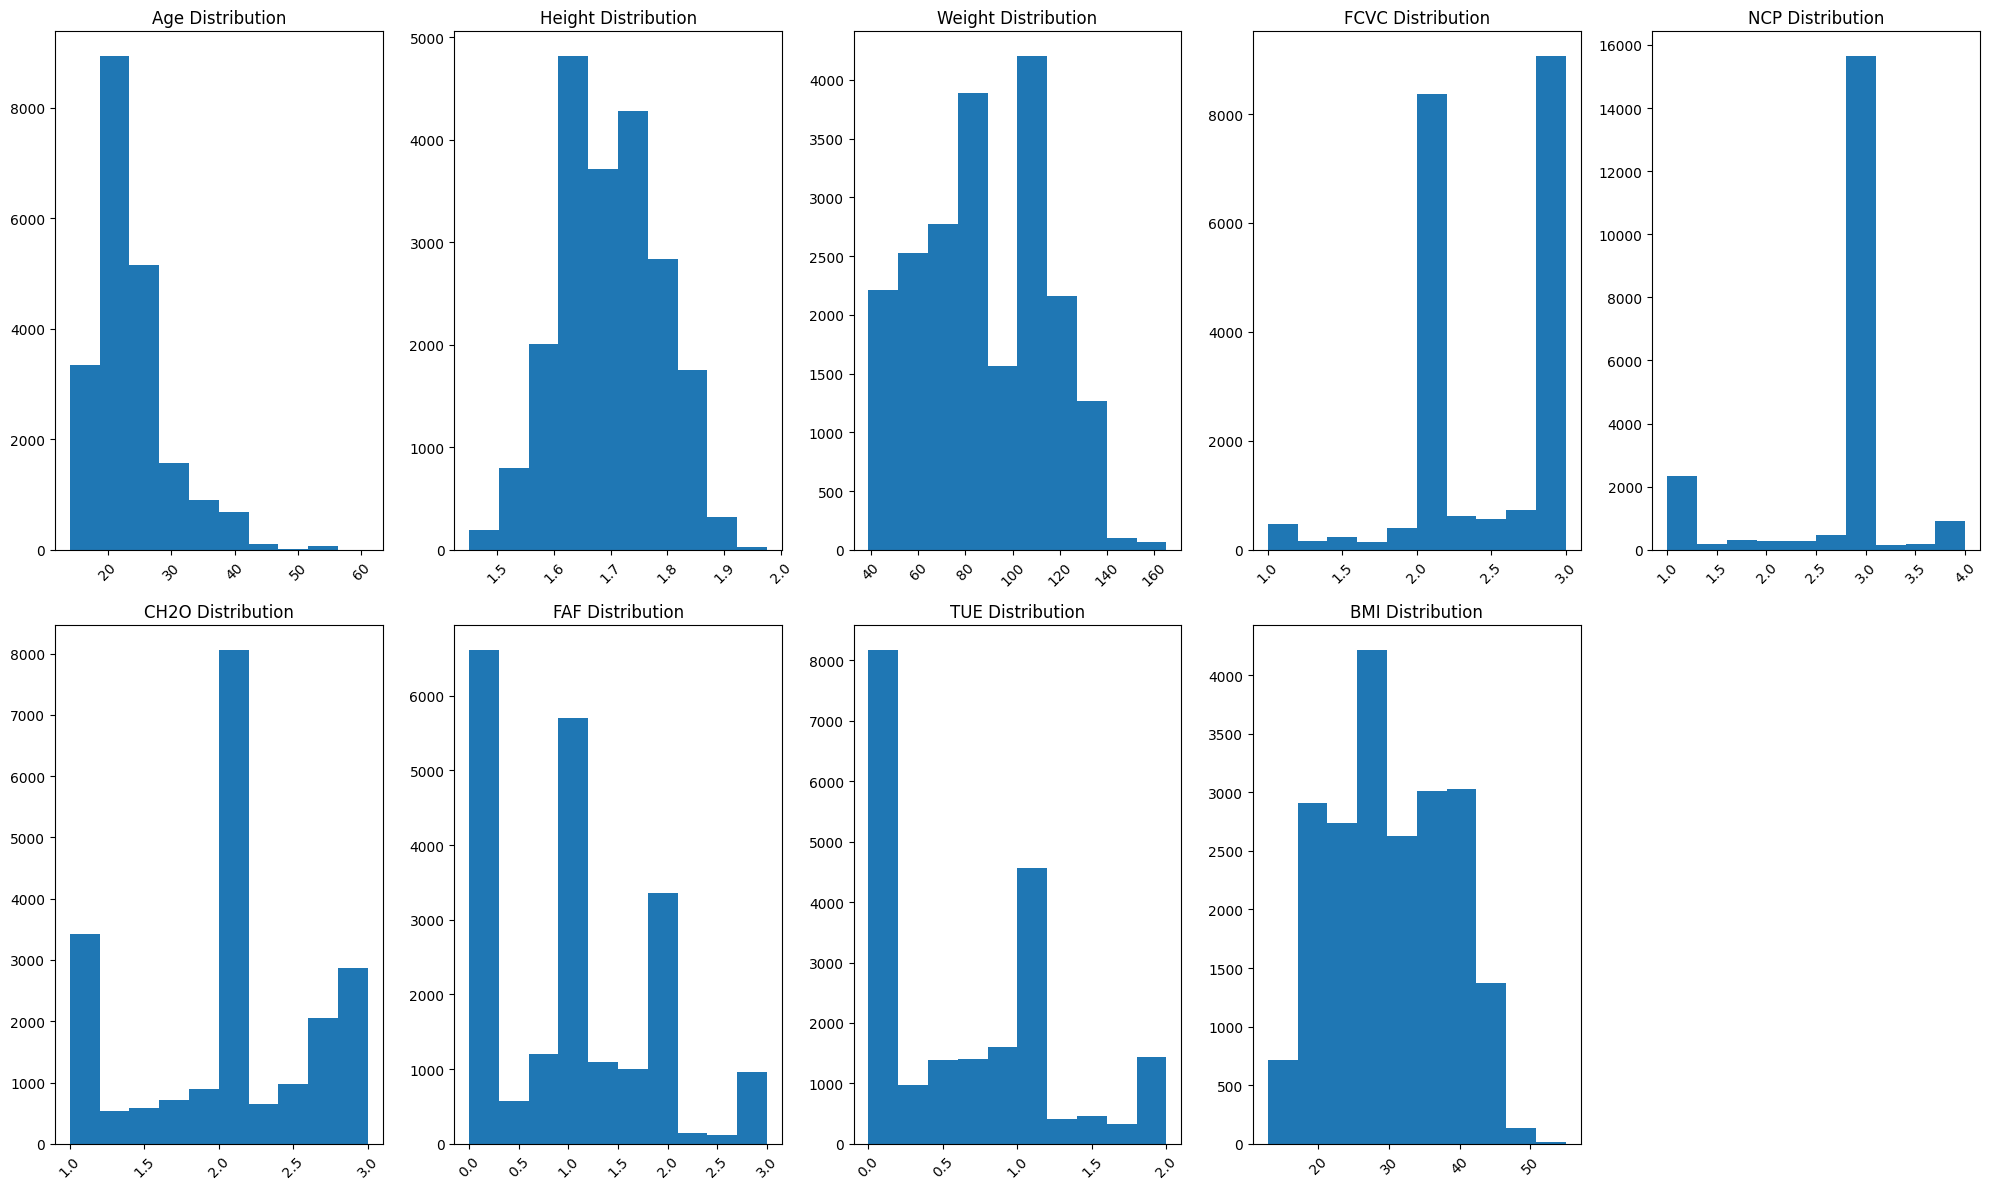

In [371]:
# numerical cols histogram
plt.figure(figsize=(20,6 * num_numerical_rows))
for i ,col in enumerate(numerical_cols,1):
    plt.subplot(num_numerical_rows, 5, i)
    plt.hist(df_train[col])
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 


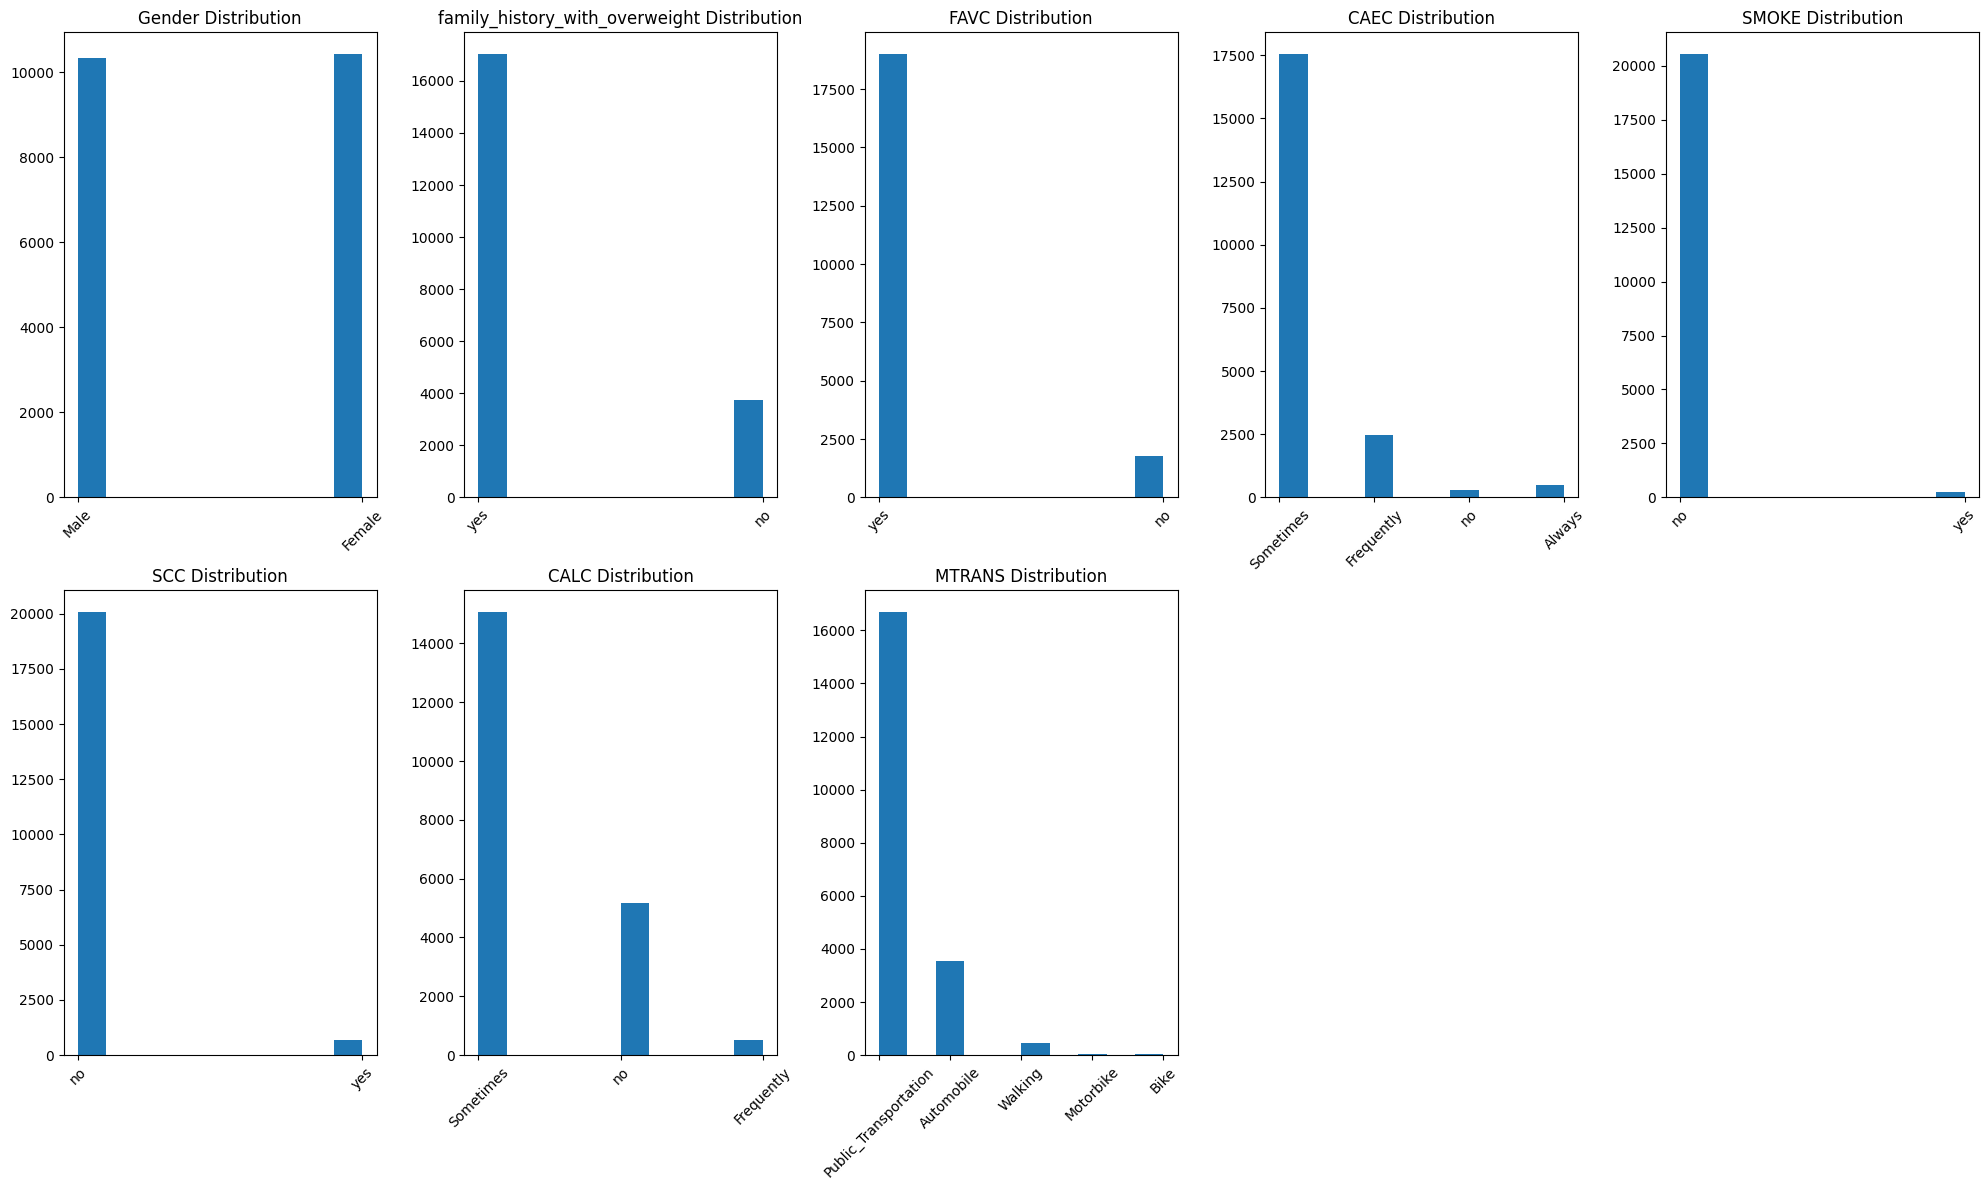

In [372]:
# categorical cols histogram
plt.figure(figsize=(20,6 * num_categorical_rows))
for i ,col in enumerate(categorical_cols,1):
    plt.subplot(num_categorical_rows, 5, i)
    plt.hist(df_train[col])
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 


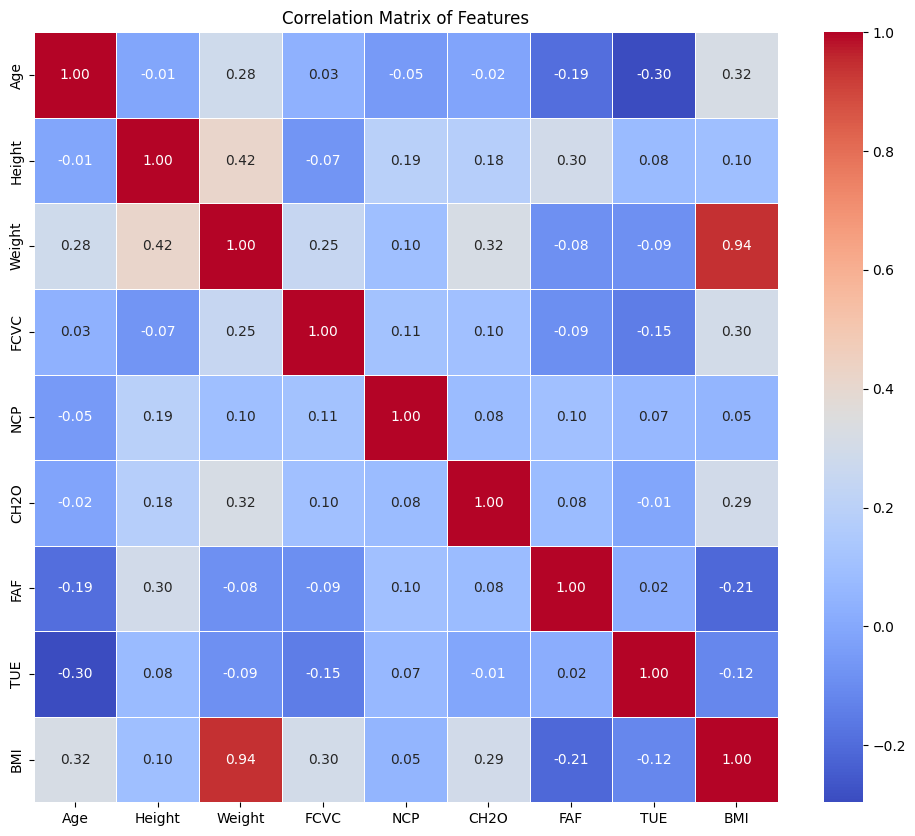

In [373]:
def corr(data):
    plt.figure(figsize=(12,10))
    sns.heatmap(data, annot=True, cmap='coolwarm', fmt='.2f', linewidths= 0.5)
    plt.title('Correlation Matrix of Features')
corr(df_train[numerical_cols].corr())

## Decision Tree

In [374]:
from sklearn.tree import DecisionTreeClassifier

# clf = DecisionTreeClassifier(ccp_alpha=0.01) - avoid overfitting
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [375]:
# do actual predictions
predictions = clf.predict(x_test)
predictions

array(['Overweight_Level_II', 'Obesity_Type_II', 'Overweight_Level_I',
       ..., 'Obesity_Type_II', 'Obesity_Type_II', 'Obesity_Type_II'],
      shape=(4152,), dtype=object)

In [376]:
results = get_stats(predictions=predictions)
print(results)

{'acc_score': 0.8282755298651252, 'prec_score': 0.806238931472728, 'recall_score': 0.8074325259390301, 'f1_score': 0.8066942668456256, 'confusion_matrix': array([[434,  41,   1,   1,   1,   3,   1],
       [ 60, 469,   2,   0,   0,  67,  11],
       [  0,   4, 452,  32,   2,  19,  59],
       [  0,   0,  31, 660,   0,   1,   8],
       [  0,   0,   4,   0, 818,   0,   0],
       [  5,  77,  30,   2,   2, 288,  77],
       [  1,  22,  63,   5,   1,  80, 318]])}


In [377]:
# check accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,predictions))

0.8282755298651252


<Axes: >

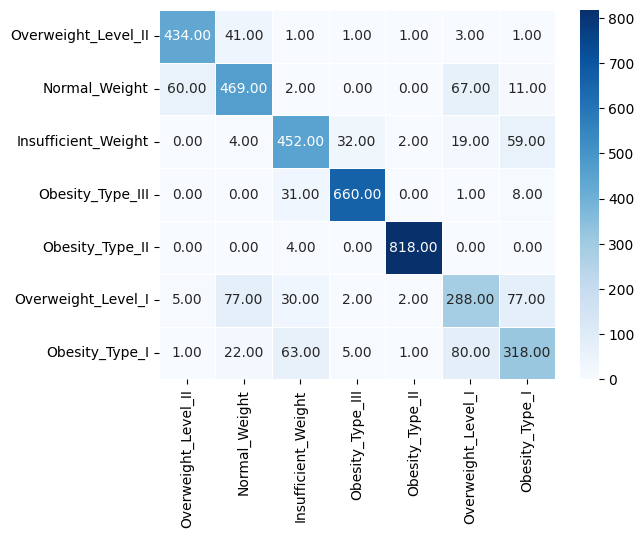

In [378]:
sns.heatmap(results['confusion_matrix'], annot=True, cmap='Blues', fmt='.2f', linewidths= 0.5,xticklabels=labels,yticklabels=labels)

In [379]:
results['prec_score']

0.806238931472728

In [380]:
results['recall_score']

0.8074325259390301

In [381]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=labels))


                     precision    recall  f1-score   support

Overweight_Level_II       0.87      0.90      0.88       482
      Normal_Weight       0.77      0.77      0.77       609
Insufficient_Weight       0.78      0.80      0.79       568
   Obesity_Type_III       0.94      0.94      0.94       700
    Obesity_Type_II       0.99      1.00      0.99       822
 Overweight_Level_I       0.63      0.60      0.61       481
     Obesity_Type_I       0.67      0.65      0.66       490

           accuracy                           0.83      4152
          macro avg       0.81      0.81      0.81      4152
       weighted avg       0.83      0.83      0.83      4152



In [382]:
# this is only possible for the decision tree algorithm

feature_importance = pd.DataFrame(clf.feature_importances_, index = x.columns).sort_values(0, ascending=False)
feature_importance

,0
BMI,0.584627
Weight,0.164564
Gender_Male,0.050500
Age,0.039657
Height,0.028653
FCVC,0.022399
CH2O,0.019189
TUE,0.017010
FAF,0.015956
NCP,0.014734


<Axes: >

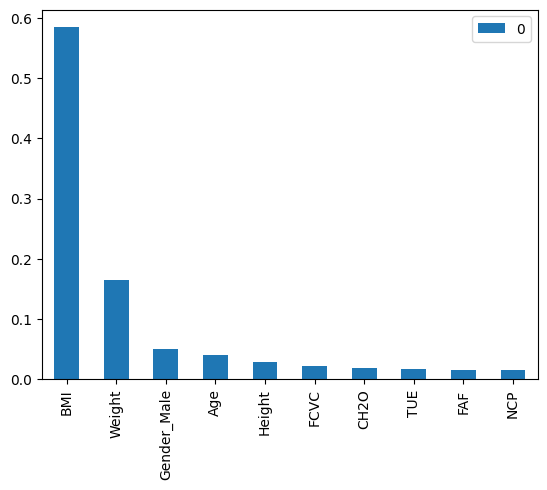

In [383]:
feature_importance.head(10).plot(kind='bar')

## K-Nearest Neighbors


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=8)
knn = knn.fit(x_train_scaled, y_train)

In [ ]:
# do actual predictions
predictions = knn.predict(x_test_scaled)
predictions

results = get_stats(predictions)

In [ ]:
# check accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,predictions))

0.7678227360308285


<Axes: >

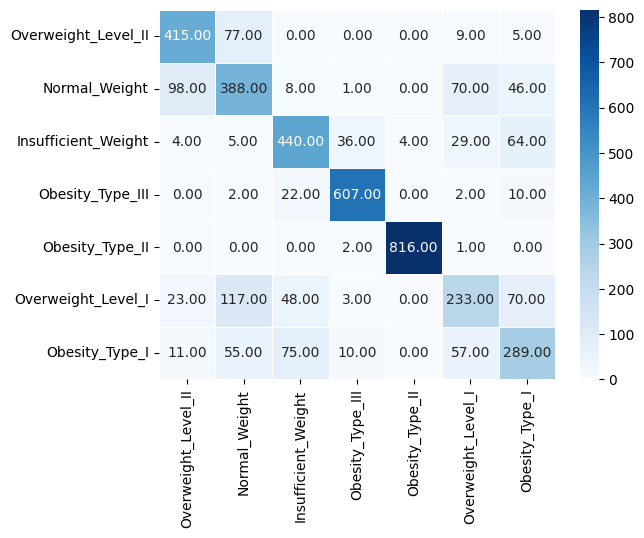

In [ ]:
# check accuracy
from sklearn.metrics import confusion_matrix

sns.heatmap(results['confusion_matrix'], annot=True, cmap='Blues', fmt='.2f', linewidths= 0.5,xticklabels=labels,yticklabels=labels)

In [ ]:
# check accuracy
from sklearn.metrics import precision_score

print(precision_score(y_test,predictions,average='macro')) # i don't know why macro

0.7417171046909777


In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, predictions,average='macro') # i don't know why macro

0.7435278127194295

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=labels))


                     precision    recall  f1-score   support

Overweight_Level_II       0.75      0.82      0.79       506
      Normal_Weight       0.60      0.64      0.62       611
Insufficient_Weight       0.74      0.76      0.75       582
   Obesity_Type_III       0.92      0.94      0.93       643
    Obesity_Type_II       1.00      1.00      1.00       819
 Overweight_Level_I       0.58      0.47      0.52       494
     Obesity_Type_I       0.60      0.58      0.59       497

           accuracy                           0.77      4152
          macro avg       0.74      0.74      0.74      4152
       weighted avg       0.76      0.77      0.76      4152



##  Support Vector Machines

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [ ]:
predictions = svc.predict(x_test)
predictions
results = get_stats(predictions)

In [ ]:
results['acc_score']

0.8179190751445087

In [ ]:
results['prec_score']

0.8037861984880855

In [ ]:
results['recall_score']

0.805073951809815

In [ ]:
results['f1_score']

0.8023153664428789

<Axes: >

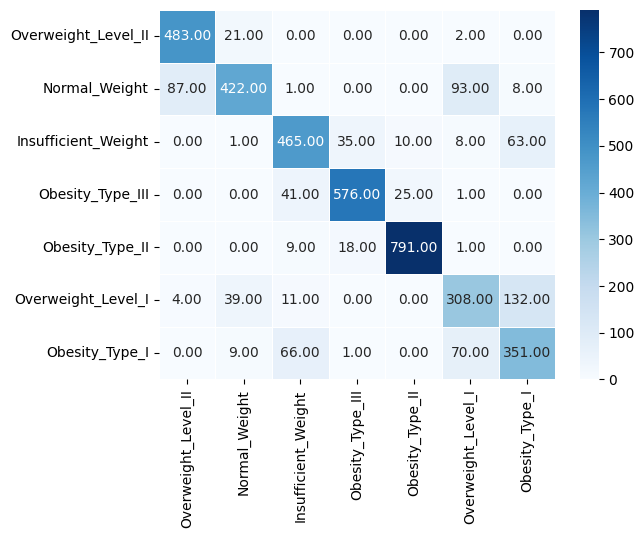

In [ ]:
sns.heatmap(results['confusion_matrix'], annot=True, cmap='Blues', fmt='.2f', linewidths= 0.5,xticklabels=labels,yticklabels=labels)

## RFE

### Decision Tree

In [ ]:
from sklearn.feature_selection import RFE

# Determines the best features so that the accuracy is maximized
# uses recursive feature elimination


max_acc = 0
best_features=0
max_features = x.shape[1]

for i in range(1,max_features):
  # Initialize RFE with the Decision Tree model and the desired number of features
  rfe = RFE(estimator=clf, n_features_to_select=i)

  # Fit RFE on the training data
  rfe.fit(x_train, y_train)

  # Get the selected features
  selected_features = x_train.columns[rfe.support_]
  print("Selected Features:", selected_features)

  # Transform the training and testing data to include only the selected features
  x_train_rfe = rfe.transform(x_train)
  x_test_rfe = rfe.transform(x_test)

  # Train the Decision Tree on the reduced feature set
  clf.fit(x_train_rfe, y_train)

  # Evaluate the model
  predictions = clf.predict(x_test_rfe)

  acc = accuracy_score(y_test,predictions)
  if(acc > max_acc):
    max_acc = acc
    best_features = i

# .84
# 4
print(max_acc)
print(best_features)

Selected Features: Index(['BMI'], dtype='object')
Selected Features: Index(['Weight', 'BMI'], dtype='object')
Selected Features: Index(['Age', 'Weight', 'BMI'], dtype='object')
Selected Features: Index(['Age', 'Weight', 'BMI', 'Gender_Male'], dtype='object')
Selected Features: Index(['Age', 'Weight', 'FAF', 'BMI', 'Gender_Male'], dtype='object')
Selected Features: Index(['Age', 'Height', 'Weight', 'FAF', 'BMI', 'Gender_Male'], dtype='object')
Selected Features: Index(['Age', 'Height', 'Weight', 'FCVC', 'FAF', 'BMI', 'Gender_Male'], dtype='object')
Selected Features: Index(['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'BMI', 'Gender_Male'], dtype='object')
Selected Features: Index(['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE', 'BMI',
       'Gender_Male'],
      dtype='object')
Selected Features: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI',
       'Gender_Male'],
      dtype='object')
Selected Features: Index(['Age', 'Height', 'Weight', '

### K-Nearest-Neighbours (this takes 20 minutes)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

# Determines the best features so that the accuracy is maximized
# uses recursive feature elimination


max_acc = 0
best_features=0
max_features = x.shape[1]

for i in range(1,max_features):

  # Initialize Sequential Feature Selector
  sfs = SequentialFeatureSelector(
      estimator=knn,
      n_features_to_select=i,  # Number of features to select
      direction='forward',     # 'forward' for adding features, 'backward' for removing features
      scoring='accuracy',      # Use accuracy to evaluate feature subsets
      cv=5,                    # Cross-validation for evaluation
      n_jobs=-1                # Use all available processors
  )

  # Fit SFS on the training data
  sfs.fit(x_train, y_train)

  # Get the selected features
  selected_features = x_train.columns[sfs.get_support()]
  print("Selected Features:", selected_features)

  # Transform the training and testing data to include only the selected features
  x_train_sfs = sfs.transform(x_train)
  x_test_sfs = sfs.transform(x_test)

  # Train the KNN model on the reduced feature set
  knn.fit(x_train_sfs, y_train)

  # Evaluate the model
  predictions = knn.predict(x_test_sfs)
  acc = accuracy_score(y_test, predictions)

  if(acc > max_acc):
    max_acc = acc
    best_features = i

# .87
# 15
print(max_acc)
print(best_features)

Selected Features: Index(['BMI'], dtype='object')
Selected Features: Index(['Weight', 'BMI'], dtype='object')
Selected Features: Index(['Age', 'Weight', 'BMI'], dtype='object')
Selected Features: Index(['Age', 'Weight', 'NCP', 'BMI'], dtype='object')
Selected Features: Index(['Age', 'Weight', 'NCP', 'BMI', 'Gender_Male'], dtype='object')
Selected Features: Index(['Age', 'Weight', 'NCP', 'BMI', 'Gender_Male', 'FAVC_yes'], dtype='object')
Selected Features: Index(['Age', 'Weight', 'FCVC', 'NCP', 'BMI', 'Gender_Male', 'FAVC_yes'], dtype='object')
Selected Features: Index(['Age', 'Weight', 'FCVC', 'NCP', 'BMI', 'Gender_Male', 'FAVC_yes',
       'CALC_no'],
      dtype='object')
Selected Features: Index(['Age', 'Weight', 'FCVC', 'NCP', 'CH2O', 'BMI', 'Gender_Male',
       'FAVC_yes', 'CALC_no'],
      dtype='object')
Selected Features: Index(['Age', 'Weight', 'FCVC', 'NCP', 'CH2O', 'BMI', 'Gender_Male',
       'FAVC_yes', 'CAEC_no', 'CALC_no'],
      dtype='object')
Selected Features: Index

### Support Vector Classifier (This takes a lot of time)

In [403]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

# Determines the best features so that the accuracy is maximized
# uses recursive feature elimination


max_acc = 0
best_features=0
max_features = x.shape[1]

for i in range(1,max_features):

  # Initialize Sequential Feature Selector
  sfs = SequentialFeatureSelector(
      estimator=svc,
      n_features_to_select=i,  # Number of features to select
      direction='forward',     # 'forward' for adding features, 'backward' for removing features
      scoring='accuracy',      # Use accuracy to evaluate feature subsets
      cv=5,                    # Cross-validation for evaluation
      n_jobs=-1                # Use all available processors
  )

  # Fit SFS on the training data
  sfs.fit(x_train, y_train)

  # Get the selected features
  selected_features = x_train.columns[sfs.get_support()]
  print("Selected Features:", selected_features)

  # Transform the training and testing data to include only the selected features
  x_train_sfs = sfs.transform(x_train)
  x_test_sfs = sfs.transform(x_test)

  # Train the KNN model on the reduced feature set
  knn.fit(x_train_sfs, y_train)

  # Evaluate the model
  predictions = knn.predict(x_test_sfs)
  acc = accuracy_score(y_test, predictions)

  if(acc > max_acc):
    max_acc = acc
    best_features = i
    print("current best:" + str(best_features))

print(max_acc)
print(best_features)

Selected Features: Index(['BMI'], dtype='object')
current best:1
Selected Features: Index(['BMI', 'Gender_Male'], dtype='object')
current best:2
Selected Features: Index(['Age', 'BMI', 'Gender_Male'], dtype='object')
current best:3


KeyboardInterrupt: 